In [4]:
import os
import shutil
from collections import defaultdict, Counter

%matplotlib inline
import matplotlib.pyplot as plt

ROOT_DIR = 'compressed_action_frames'

def create_directory(path):
    try:
        os.stat(path)
    except:
        os.mkdir(path)

In [13]:
## Plot the distribution of #clips for each category, as well as the number of clips belonging to each category

def get_stats(dir_path):
    class_count = Counter()
    clip_distribution = defaultdict(list)
    for clip_name in os.listdir(dir_path):
        loc1 = clip_name.find('>')
        loc2 = clip_name.find('-')

        class_name = clip_name[(loc1 + 1): loc2] 
        class_count[class_name] += 1
        clip_distribution[class_name].append(len(os.listdir(os.path.join(dir_path, clip_name))))
    
    return class_count, clip_distribution

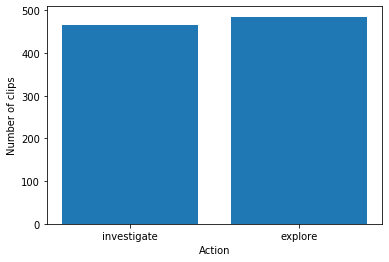

In [6]:
## Plot the number of clips for each class, so that the dataset is balanced

class_count, clip_distribution = get_stats(ROOT_DIR)
plt.bar(range(len(class_count)), list(class_count.values()), align='center')
plt.xticks(range(len(class_count)), list(class_count.keys()))
plt.xlabel('Action')
plt.ylabel('Number of clips')

plt.show()

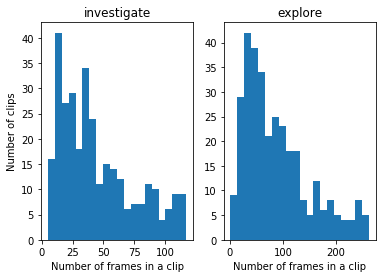

In [7]:
## Plot the distribution of clips for each class, need to trim smaller clips

fig, ax = plt.subplots(1,2)
counter = 0
for class_name, dist in clip_distribution.items():
    dist.sort()
    dist = dist[:int(len(dist)/1.5)]
#     print(dist)
    
    ax[counter].hist(dist, bins=20)
    ax[counter].set_title(class_name)
    ax[counter].set_xlabel('Number of frames in a clip')
    if counter == 0:
        ax[counter].set_ylabel('Number of clips')
    counter += 1
plt.show()

In [11]:
## Copy all the files which have atleast 60 frames

threshold = 60
THRESH_DIR = '%s-%d-all'%(ROOT_DIR, threshold)

create_directory(THRESH_DIR)
for clip_name in os.listdir(ROOT_DIR):
    clip_path = os.path.join(ROOT_DIR, clip_name)
    frame_count = len(os.listdir(clip_path))
    if threshold <= frame_count:
        num_splits = frame_count//threshold
        
        for s in range(num_splits):
            new_clip_path = os.path.join(THRESH_DIR, clip_name+"-%d"%s)
            create_directory(new_clip_path)
            for i in range(1,threshold+1):
                    shutil.copy(os.path.join(clip_path,"%d.jpg"%(threshold*s+i)), os.path.join(new_clip_path, "%d.jpg"%i))
            

Counter({'explore': 3334, 'investigate': 1109})


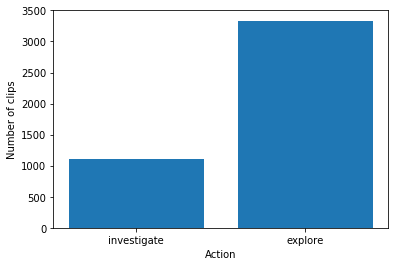

In [18]:
class_count, clip_distribution = get_stats(THRESH_DIR)
plt.bar(range(len(class_count)), list(class_count.values()), align='center')
plt.xticks(range(len(class_count)), list(class_count.keys()))
plt.xlabel('Action')
plt.ylabel('Number of clips')

plt.show()

In [ ]:
## Randomly delete 2200 explore clips

import random
explore_list = []
for clip_name in os.listdir(THRESH_DIR):
    loc1 = clip_name.find('>')
    loc2 = clip_name.find('-')

    class_name = clip_name[(loc1 + 1): loc2] 
    if class_name == 'explore': 
        explore_list.append(clip_name)
delete_list = random.sample(explore_list, k=2200)
